<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.

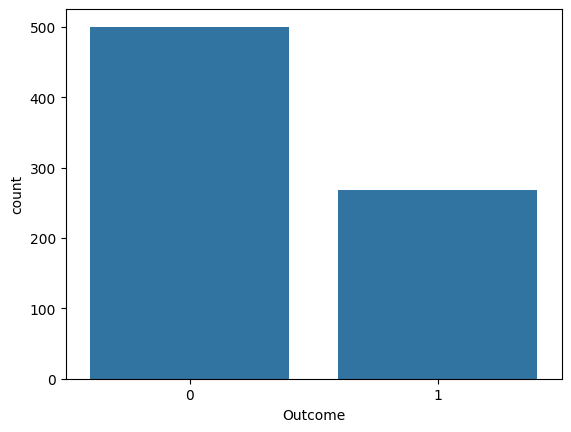

Logistic Regression: Sensitivity = 0.673, Specificity = 0.788
Decision Tree: Sensitivity = 0.727, Specificity = 0.758
SVM: Sensitivity = 0.564, Specificity = 0.879
KNN: Sensitivity = 0.582, Specificity = 0.707


In [3]:
#Imorting multiple libraries  to read , analyze and visualize the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the diabetes dataset
dataset = pd.read_csv('/content/sample_data/diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Displaying the  dataset
dataset.head()

#Checking the dataset shape
dataset.shape

#Basic information regarding the data
dataset.info()

# Finding the missing values
dataset.isnull().sum()

# Describe function gives the basic numerical info about data for each numeric feature
print(dataset.describe(include='all'))

# Data points count value for each class labels
dataset.Outcome.value_counts()

# Visualize the distribution of Outcome (target variable)
sns.countplot(x='Outcome', data=dataset)
plt.show()

# Importing necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the models
lr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
knn = KNeighborsClassifier()

# Training the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Function to calculate sensitivity and specificity
def calc_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Evaluating the models
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'SVM': svm, 'KNN': knn}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    sensitivity, specificity = calc_metrics(y_test, y_pred)
    results[name] = {'Sensitivity': sensitivity, 'Specificity': specificity}

# Displaying results
for name, metrics in results.items():
    print(f"{name}: Sensitivity = {metrics['Sensitivity']:.3f}, Specificity = {metrics['Specificity']:.3f}")